# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/cs230/womens_edu 

/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu


In [3]:
import argparse
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
!git config --global user.email "disaaldan@gmail.com"
!git config --global user.name "disaalda"

In [5]:
dataset_root_dir = '/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/'

# Satellite Imagery

## Read In Data

In [ ]:
 # alda
# haya
dataset_root_dir = '/content/drive/.shortcut-targets-by-id/1UmSDcE4n7YnHUjCIvlrq4izeyNfRvNRj/cs230/womens_edu/data/'
satellite_df = pd.read_csv(os.path.join(dataset_root_dir, 'ZM_ZW_satellite.csv'))
satellite_df = satellite_df.sample(frac=1)

In [ ]:
satellite_df.head()

DHSID_EA  year  cc        lat        lon  women_edu  \
5414  UG-2000-4#-00003809  2000  UG   0.847980  34.186951   4.772727   
9377  ZW-2005-5#-00000184  2005  ZW -20.657432  29.946406   8.142857   
3748  TZ-2012-6Z-00000341  2012  TZ  -6.047683  39.341676   8.763158   
6372  UG-2014-7#-00000054  2014  UG   0.569566  33.629756   6.185185   
8553  ZM-2013-6#-00000710  2013  ZM -15.044233  22.327652   2.454545   

                                                   path  
5414  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
9377  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
3748  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
6372  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
8553  /content/drive/MyDrive/Colab Notebooks/cs230/w...

In [ ]:
# MEANS = {
#     'BLUE':    0.06547681,
#     'GREEN':   0.09543012,
#     'RED':     0.10692262,
#     'SWIR1':   0.22902039,
#     'SWIR2':   0.15596166,
#     'TEMP1': 298.51077,
#     'NIR':     0.2542566,
#     'DMSP':   41.69006032536221,
#     'VIIRS':   3.443405293536357
#     # 'NIGHTLIGHTS': 20.753946  # nightlights overall
# }

# STD_DEVS = {
#     'BLUE':    0.031534348,
#     'GREEN':   0.04290699,
#     'RED':     0.06305032,
#     'SWIR1':   0.09461683,
#     'SWIR2':   0.08886013,
#     'TEMP1':   8.608657,
#     'NIR':     0.06909249,
#     'DMSP':  109.7289863161683,
#     'VIIRS':  10.97284745670896
#     # 'NIGHTLIGHTS': 76.66724  # nightlights overall
# }

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


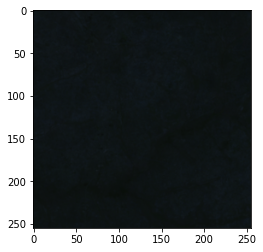

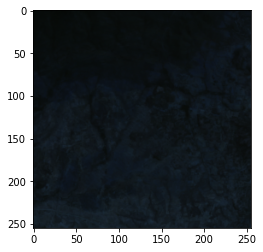

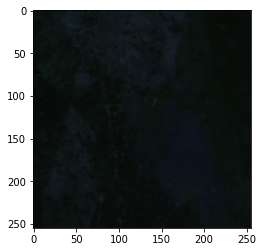

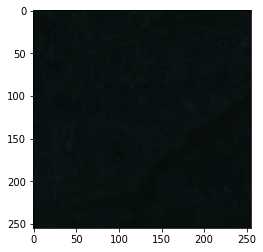

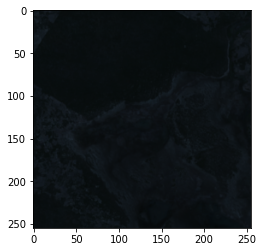

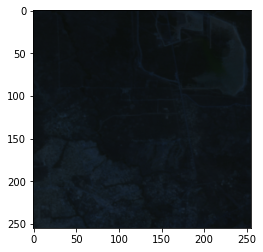

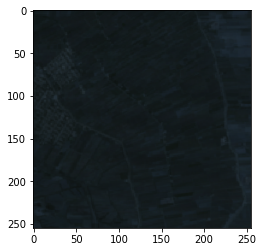

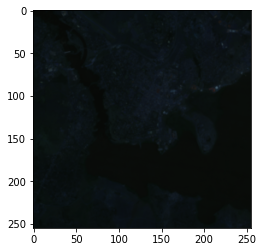

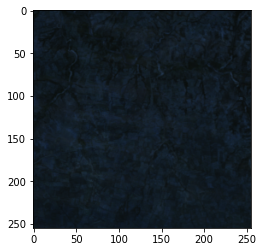

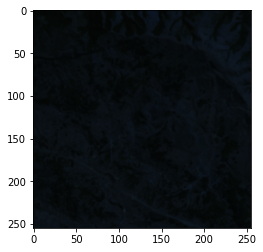

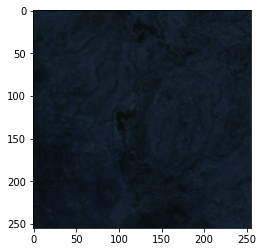

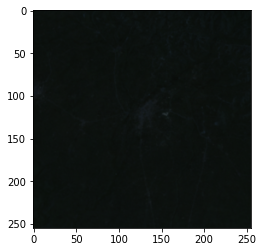

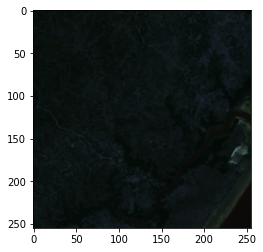

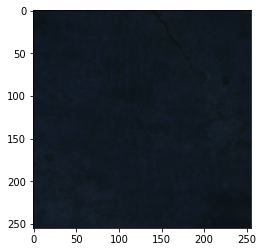

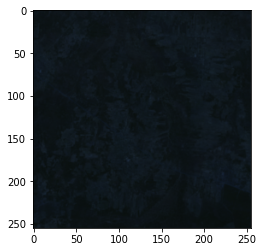

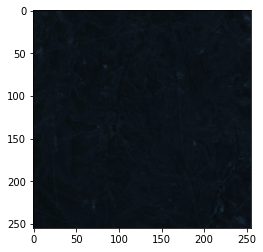

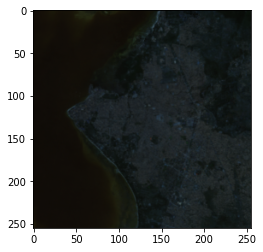

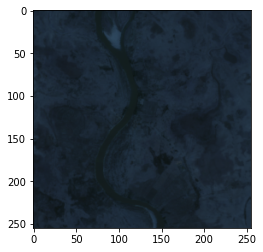

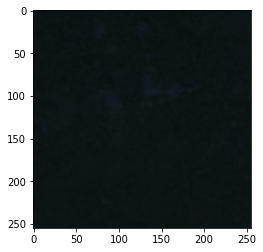

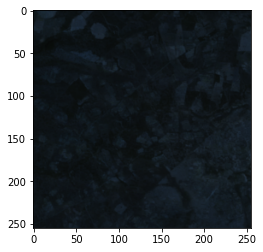

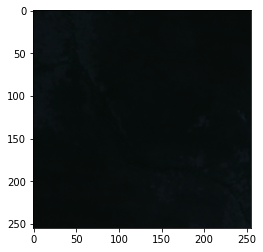

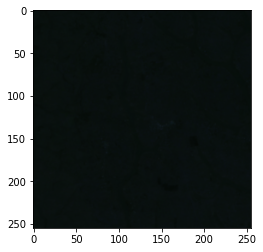

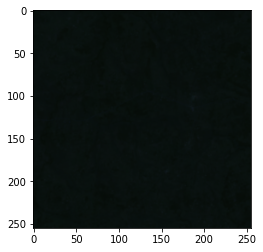

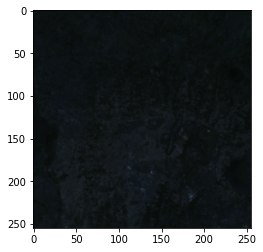

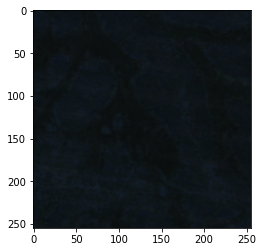

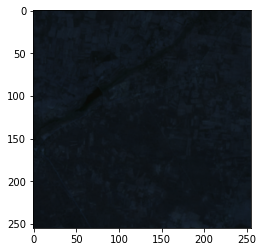

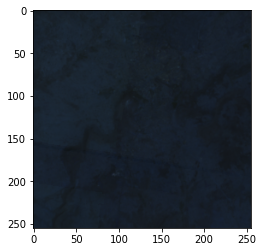

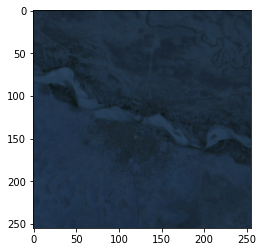

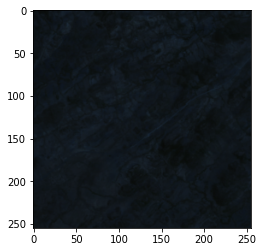

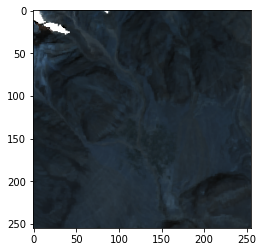

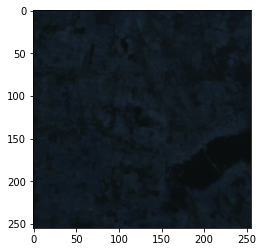

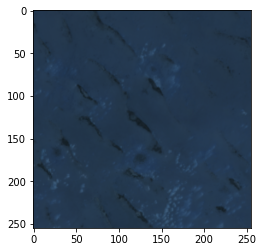

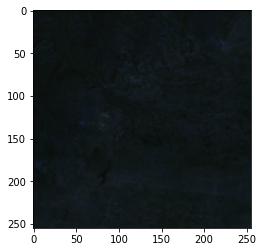

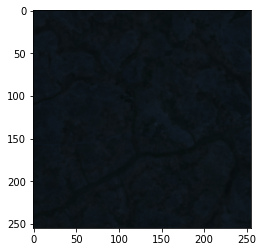

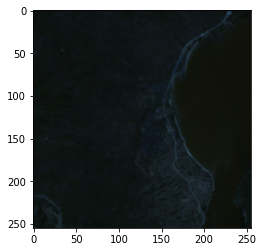

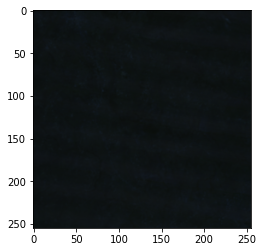

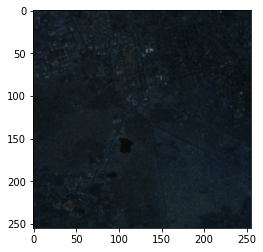

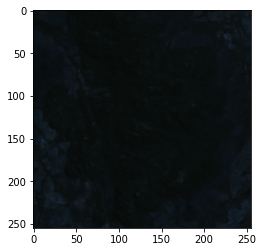

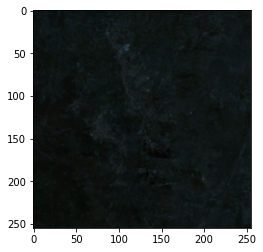

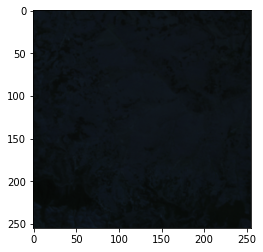

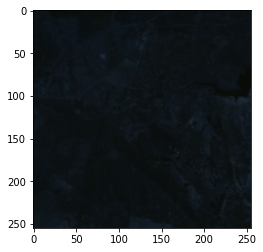

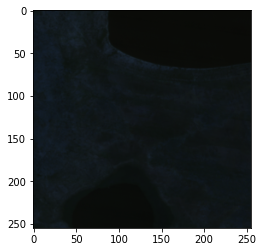

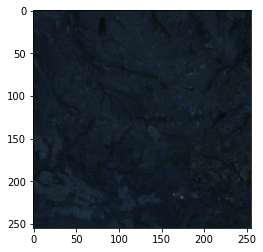

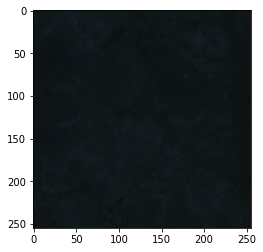

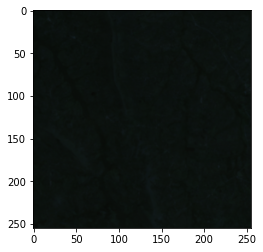

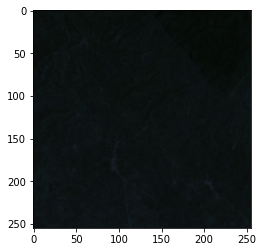

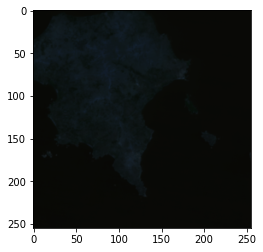

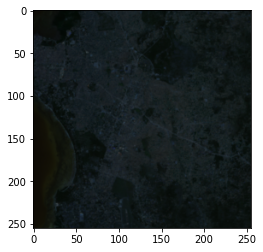

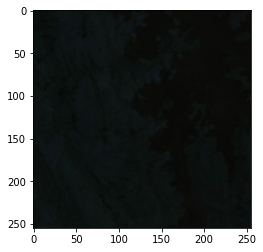

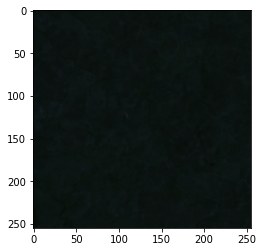

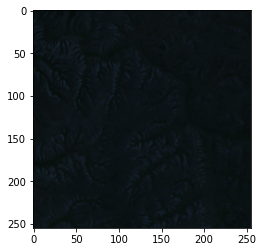

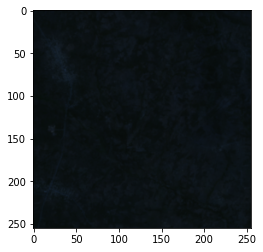

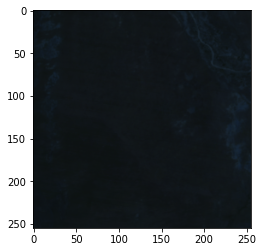

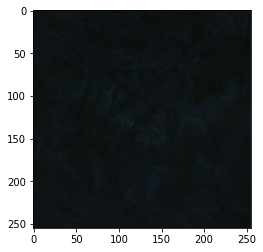

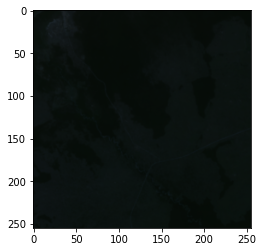

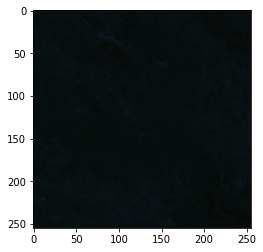

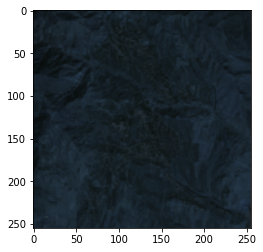

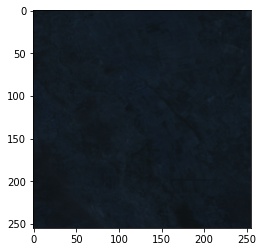

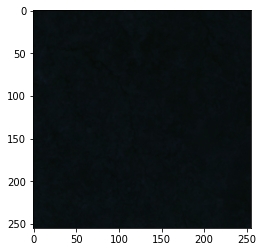

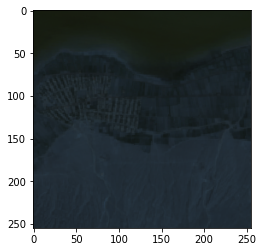

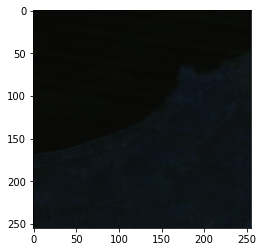

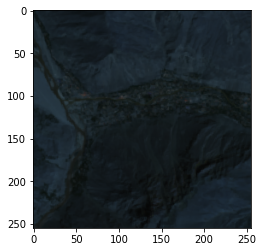

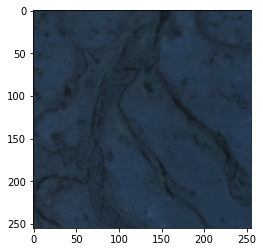

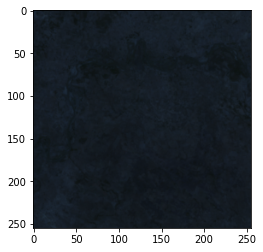

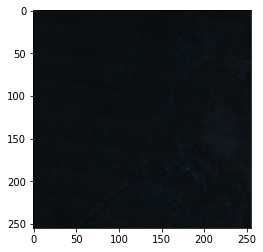

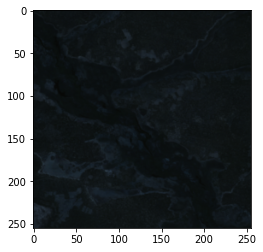

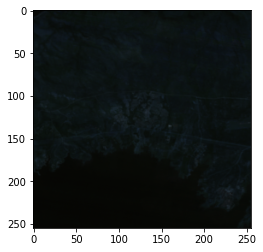

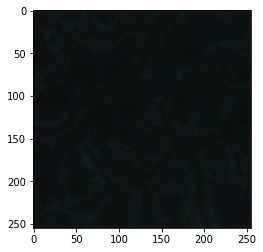

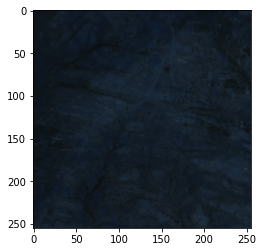

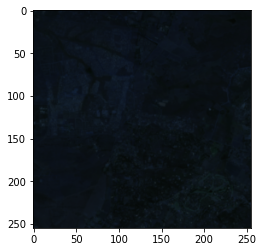

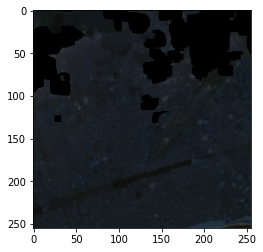

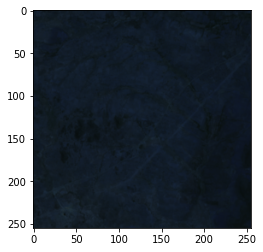

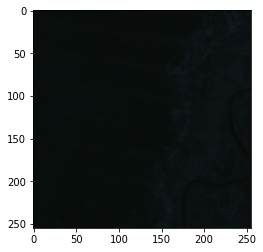

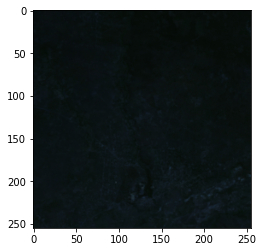

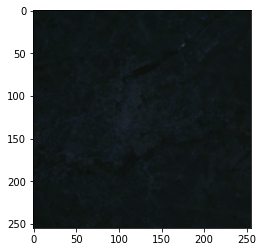

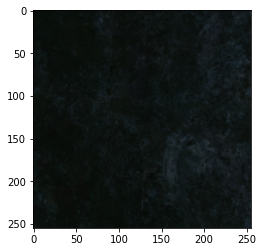

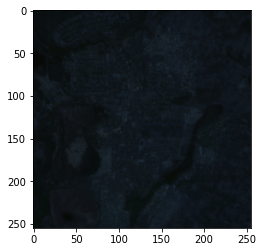

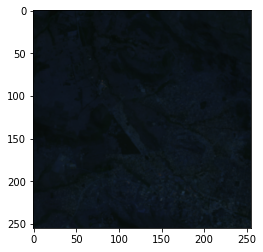

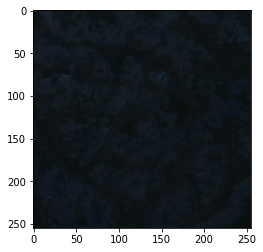

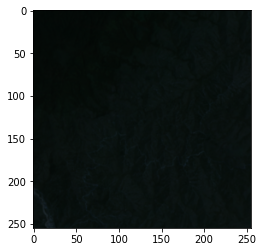

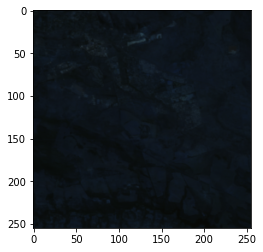

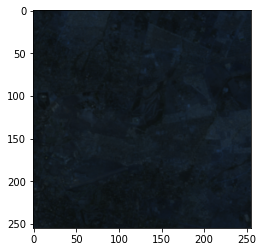

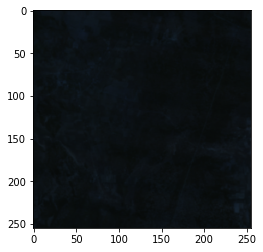

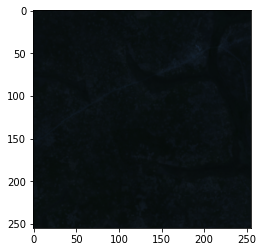

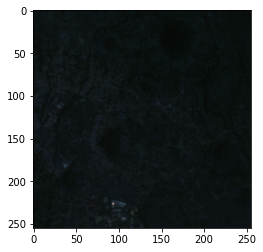

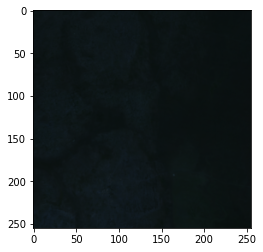

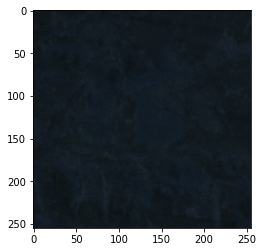

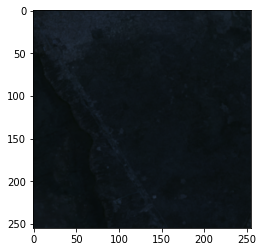

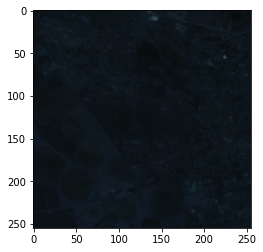

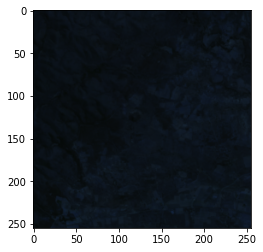

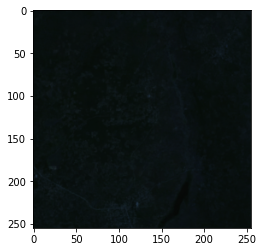

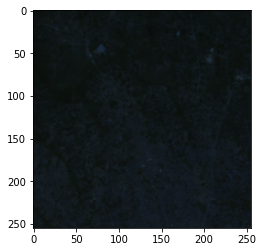

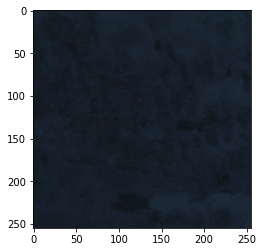

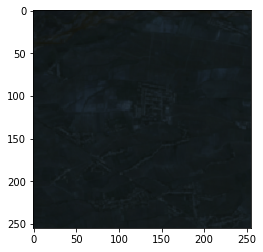

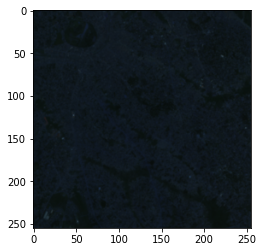

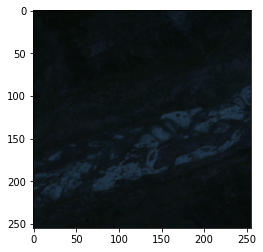

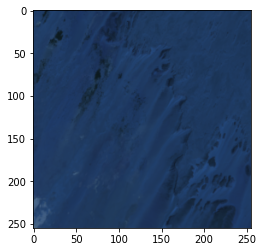

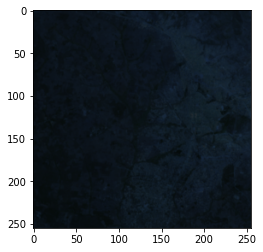

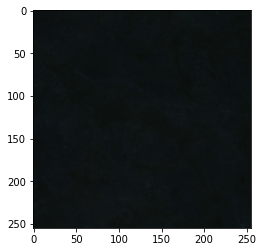

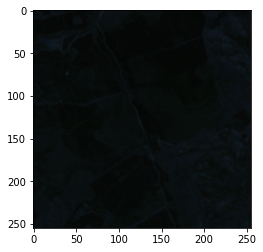

In [ ]:
for i in satellite_df['path'][:100]:
  images = np.load(i)['x']
  #print(images.shape)
  #images.shape
  images = images[:3,:,:]
  images = images.transpose((1,2,0))
  #images = (images - images.min()) / (images.max() - images.min())
  images = images[::-1,:,:]
  #print(images.min(), images.max(), images[0].mean(), images[1].mean(), images[2].mean())
  plt.ion()
  plt.figure()
  plt.imshow(images)
  

In [ ]:
import torch
dfile = "data/dhs_TD_ZW/TZ-2007-5#/TZ-2007-5#-00000475.npz"
image = np.load(dfile)['x']
img = torch.from_numpy(image).float()
img = img[:3]
img.shape, img.max(), img.min()

(torch.Size([3, 255, 255]), tensor(0.2137), tensor(0.0344))

In [ ]:
dfile = "data/dhs_TD_ZW/TZ-2007-5#/TZ-2007-5#-00000475.npz"
images = np.load(dfile)['x']
print(images.shape)
images.shape
images = images[:3,:,:]
images = images.transpose((1,2,0))
images = images[::-1,:,:]
print(images.min(), images.max())
plt.imshow(images*4)
# for i in range(len(images)):
#   plt.ion()
#   plt.figure()
#   plt.imshow(images[i])

In [ ]:
images.shape

In [ ]:
dfile = "data/dhs_TD_ZW/ZM-2007-5#/ZM-2007-5#-00000320.npz"
images = np.load(dfile)['x']
images.shape

## Create a Dataset with Labels and Image Path

In [ ]:
dataset_root_dir = '/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/'

In [ ]:
df = pd.read_csv(os.path.join(dataset_root_dir, 'dhs_final_labels.csv'))
len(df)

117644

In [ ]:
df['survey'] = df['DHSID_EA'].str[:10]
df['cc'] = df['DHSID_EA'].str[:2]
df['path'] = dataset_root_dir + '/dhs_IA/' + df['survey'] + '/' + df['DHSID_EA'] + '.npz'

In [ ]:
df.head()

DHSID_EA cname  year        lat        lon  n_asset  \
0  AL-2008-5#-00000001    AL  2008  40.822652  19.838321     18.0   
1  AL-2008-5#-00000002    AL  2008  40.696846  20.007555     20.0   
2  AL-2008-5#-00000003    AL  2008  40.750037  19.974262     18.0   
3  AL-2008-5#-00000004    AL  2008  40.798931  19.863338     19.0   
4  AL-2008-5#-00000005    AL  2008  40.746123  19.843885     19.0   

   asset_index  n_water  water_index  n_sanitation  ...  women_bmi  \
0     2.430596     18.0     3.444444          18.0  ...  24.365000   
1     2.867678     20.0     4.700000          20.0  ...  23.104000   
2     2.909049     18.0     4.500000          18.0  ...  22.387778   
3     2.881122     19.0     4.947368          19.0  ...  27.084500   
4     2.546830     19.0     4.684211          19.0  ...  24.523125   

   n_women_edu  n_women_bmi  cluster_id  adm1fips  adm1dhs  urban      survey  \
0         18.0         18.0           1       NaN     9999      R  AL-2008-5#   
1         20.0         20.0           2       NaN     9999      R  AL-2008-5#   
2         18.0         18.0           3       NaN     9999      R  AL-2008-5#   
3         21.0         20.0           4       NaN     9999      R  AL-2008-5#   
4         16.0         16.0           5       NaN     9999      R  AL-2008-5#   

   cc                                               path  
0  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
1  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
2  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
3  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
4  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  

[5 rows x 24 columns]

In [ ]:
# randomly sample images from the downloaded images 
# EG_HT_list = ['EG', 'EC', 'ET', 'GN', 'HT', 'GH', 'EG', 'GY', 'GN', 'GU', 'HN']
# TD_ZW_list = ['ZM', 'ZW', 'UG', 'TZ', 'TJ', 'TG', 'TD']  
# ID_MZ_list = ['MD', 'JO', 'ML', 'LB', 'MM', 'MZ', 'MW', 'MZ', 'KH', 'LS', 'KY', 
             # 'KE', 'MB', 'ID', 'JO', 'MA']
# NG_SZ_list = ['NG', 'NI', 'NM', 'NP', 'PE', 'PH', 'PK','RW','SL', 'SN', 'SZ']
# AL_DR_list = ['AL', 'AM', 'AO', 'BD', 'BF', 'BJ', 'BO', 'BU', 'CD', 'CI', 'CM',
#             'CO', 'DR']
IA_list = ['IA']

countries_list = IA_list
df_sub = df[ df['cc'].isin(countries_list) ]
len(df_sub)

26747

In [ ]:
cc_count = df_sub.groupby(['cc'])['cc'].count()
cc_count

cc
IA    26747
Name: cc, dtype: int64

In [ ]:
df_sub.set_index('DHSID_EA', verify_integrity=True, inplace=True)

In [ ]:
label_cols = ['year', 'cc', 'lat', 'lon', 'women_edu', 'path']
df_sub = df_sub[label_cols]
df_sub.head()

year  cc        lat        lon  women_edu  \
DHSID_EA                                                         
IA-2015-7#-00010001  2015  IA  11.670645  92.745799  11.428571   
IA-2015-7#-00010002  2015  IA   9.143844  92.826752   8.264706   
IA-2015-7#-00010003  2015  IA   9.212246  92.753633   8.227273   
IA-2015-7#-00010004  2015  IA   9.165413  92.742696   9.175000   
IA-2015-7#-00010005  2015  IA   8.307356  93.093792   7.652174   

                                                                  path  
DHSID_EA                                                                
IA-2015-7#-00010001  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
IA-2015-7#-00010002  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
IA-2015-7#-00010003  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
IA-2015-7#-00010004  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
IA-2015-7#-00010005  /content/drive/MyDrive/Colab Notebooks/cs230/w...

In [ ]:
df_sub = df_sub.dropna() 
len(df_sub)

26730

In [ ]:
df_sub.to_csv(os.path.join(dataset_root_dir, 'IA_satellite.csv'))

## EDA 

In [ ]:
df_sub.describe()

year           lat           lon     women_edu
count  15309.000000  15309.000000  15309.000000  15309.000000
mean    2008.834542     18.230925     -2.870200      5.596736
std        5.896015      9.326237     47.325473      3.517414
min     1998.000000      1.617028    -92.176053      0.000000
25%     2005.000000      9.591974    -14.583901      2.666667
50%     2009.000000     15.383709     30.471691      5.588235
75%     2014.000000     29.200247     31.998364      8.186047
max     2019.000000     31.610813     47.007920     16.600000

(array([2611., 2001., 2170., 2404., 2467., 1896., 1060.,  457.,  190.,
          53.]),
 array([ 0.  ,  1.66,  3.32,  4.98,  6.64,  8.3 ,  9.96, 11.62, 13.28,
        14.94, 16.6 ]),
 <a list of 10 Patch objects>)

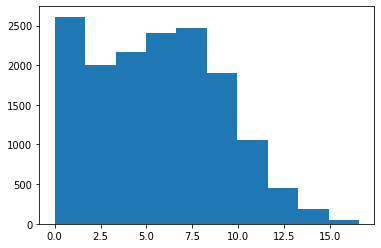

In [ ]:
plt.hist(df_sub['women_edu'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca231b59d0>,
      dtype=object)

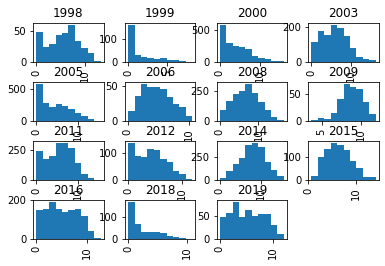

In [ ]:
df_sub['women_edu'].hist(by=df_sub['year'])

In [ ]:
cc_avg = df_sub.groupby(['cc'])['women_edu'].mean()
cc_avg

cc
EG    6.905548
ET    2.989550
GH    6.202401
GN    2.049263
GU    6.338913
GY    8.790143
HN    7.073810
HT    5.153111
Name: women_edu, dtype: float64

In [ ]:
year_count = df_sub.groupby(['year', 'cc'])['year'].count()
year_count

year  cc
1998  GH     330
1999  GN     293
2000  EG     960
      ET     535
      HT     316
2003  EG     735
      GH     407
2005  EG    1255
      ET     528
      GN     291
2006  HT     332
2008  EG    1189
      GH     402
2009  GY     306
2011  ET     571
      HN    1122
2012  GN     300
      HT     437
2014  EG    1564
      GH     423
2015  GU     853
2016  ET     621
      GH     192
      HT     450
2018  GN     400
2019  ET     305
      GH     192
Name: year, dtype: int64

In [ ]:
year_count = df_sub.groupby(['year'])['year'].count().cumsum()
year_count

year
1998      330
1999      623
2000     2434
2003     3576
2005     5650
2006     5982
2008     7573
2009     7879
2011     9572
2012    10309
2014    12296
2015    13149
2016    14412
2018    14812
2019    15309
Name: year, dtype: int64

# TO DO: Street-Level Imagery

In [ ]:
dataset_root_dir = '/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/'
df = pd.read_csv(os.path.join(dataset_root_dir, 'dhs_final_labels.csv'))
list(df)

['DHSID_EA',
 'cname',
 'year',
 'lat',
 'lon',
 'n_asset',
 'asset_index',
 'n_water',
 'water_index',
 'n_sanitation',
 'sanitation_index',
 'under5_mort',
 'n_under5_mort',
 'women_edu',
 'women_bmi',
 'n_women_edu',
 'n_women_bmi',
 'cluster_id',
 'adm1fips',
 'adm1dhs',
 'urban']

In [ ]:
street_df.head()

key country unique_cluster       ilon       ilat  \
0  VPl_yOtiye7JRBapXWX1UQ      ia      ia_291024  72.833907  24.556130   
1  hwU7_w-ST7wzQCyIb2feDg      ia      ia_291024  72.833471  24.556297   
2  2pqcPe-lFbYw1c8TF4-cqQ      ia      ia_291024  72.833585  24.556220   
3  Doqvlqi6V06NIpzGoZIz-A      ia      ia_291024  72.834197  24.555938   
4  i_s1KgQ9hj4XRQrD70i1LA      ia      ia_291024  72.831481  24.557171   

         lat      lon                                           features  \
0  24.633952  72.8759  [255, 58, 33, 57, 60, 39, 48, 10, 17, 19, 22, 57]   
1  24.633952  72.8759                      [255, 48, 10, 16, 19, 22, 27]   
2  24.633952  72.8759                      [255, 32, 55, 10, 19, 22, 27]   
3  24.633952  72.8759                [255, 58, 3, 4, 10, 17, 19, 22, 27]   
4  24.633952  72.8759                  [255, 32, 61, 55, 10, 19, 22, 27]   

                                       features_name  \
0  ['void', 'object--vehicle--car', 'human--rider...   
1  ['void', 'object--support--pole', 'constructio...   
2  ['void', 'human--rider--bicyclist', 'object--v...   
3  ['void', 'object--vehicle--car', 'construction...   
4  ['void', 'human--rider--bicyclist', 'object--v...   

                                          confidence       pov  pov_label  \
0  [0.0, 0.9985752105712891, 0.9725765585899353, ...  0.022175          0   
1  [0.0, 0.7800350785255432, 1.0, 1.0, 1.0, 1.0, ...  0.022175          0   
2  [0.0, 0.6493595242500305, 0.5863090753555298, ...  0.022175          0   
3  [0.0, 0.9902521371841431, 1.0, 1.0, 1.0, 1.0, ...  0.022175          0   
4  [0.0, 0.9895737767219543, 0.9340438842773438, ...  0.022175          0   

        pop  pop_label       bmi  bmi_label  
0 -0.918986          0 -0.627523          0  
1 -0.918986          0 -0.627523          0  
2 -0.918986          0 -0.627523          0  
3 -0.918986          0 -0.627523          0  
4 -0.918986          0 -0.627523          0

In [ ]:
street_df['img_path'] = dataset_root_dir + street_df['img_path']
street_df.head()

DHSID_EA country_code  year  img_captured_at    img_lon  \
0  KY-2012-6#-00000210           KY  2012    1431267666548  74.460870   
1  KY-2012-6#-00000210           KY  2012    1431267739832  74.470439   
2  KY-2012-6#-00000210           KY  2012    1431267636142  74.452695   
3  KY-2012-6#-00000210           KY  2012    1431267747422  74.470359   
4  KY-2012-6#-00000210           KY  2012    1431267686722  74.465621   

     img_lat            img_id  \
0  43.051974  2683402805284887   
1  43.053836   859209238017030   
2  43.050860   518307519178827   
3  43.054024  1370367363330031   
4  43.052592   473814717185741   

                                            img_path  
0  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
1  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
2  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
3  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
4  /content/drive/MyDrive/Colab Notebooks/cs230/w...

In [ ]:
street_df['img_id'] = street_df['img_id'].astype(str)

In [ ]:
street_df['img_path_resized'] =  os.path.join(dataset_root_dir, 'KY') + '/' + street_df['DHSID_EA'] + '/' + street_df['img_id'] + ' resized.jpg'

In [ ]:
street_df.head()

DHSID_EA country_code  year  img_captured_at    img_lon  \
0  KY-2012-6#-00000210           KY  2012    1431267666548  74.460870   
1  KY-2012-6#-00000210           KY  2012    1431267739832  74.470439   
2  KY-2012-6#-00000210           KY  2012    1431267636142  74.452695   
3  KY-2012-6#-00000210           KY  2012    1431267747422  74.470359   
4  KY-2012-6#-00000210           KY  2012    1431267686722  74.465621   

     img_lat            img_id  \
0  43.051974  2683402805284887   
1  43.053836   859209238017030   
2  43.050860   518307519178827   
3  43.054024  1370367363330031   
4  43.052592   473814717185741   

                                            img_path  \
0  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
1  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
2  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
3  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
4  /content/drive/MyDrive/Colab Notebooks/cs230/w...   

                                    img_path_resized  
0  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
1  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
2  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
3  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
4  /content/drive/MyDrive/Colab Notebooks/cs230/w...

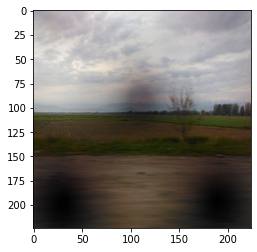

In [ ]:
image = plt.imread(street_df['img_path_resized'][1000])
plt.imshow(image)

In [ ]:
image.shape # permute this later on 

(224, 224, 3)

In [ ]:
year_count = street_df.groupby(['year'])['year'].count()
year_count

year
2012    1105
Name: year, dtype: int64

In [ ]:
# left join labels to street metadata df
street_labels_df = street_df.merge(df[['DHSID_EA','women_edu']], on='DHSID_EA', how='left')
street_labels_df.head(10)

DHSID_EA country_code  year  img_captured_at    img_lon  \
0  KY-2012-6#-00000210           KY  2012    1431267666548  74.460870   
1  KY-2012-6#-00000210           KY  2012    1431267739832  74.470439   
2  KY-2012-6#-00000210           KY  2012    1431267636142  74.452695   
3  KY-2012-6#-00000210           KY  2012    1431267747422  74.470359   
4  KY-2012-6#-00000210           KY  2012    1431267686722  74.465621   
5  KY-2012-6#-00000210           KY  2012    1431267752512  74.470076   
6  KY-2012-6#-00000210           KY  2012    1431267737290  74.470452   
7  KY-2012-6#-00000210           KY  2012    1431267653977  74.457561   
8  KY-2012-6#-00000210           KY  2012    1431267603401  74.443755   
9  KY-2012-6#-00000210           KY  2012    1431267726866  74.470536   

     img_lat            img_id  \
0  43.051974  2683402805284887   
1  43.053836   859209238017030   
2  43.050860   518307519178827   
3  43.054024  1370367363330031   
4  43.052592   473814717185741   
5  43.054048   137005738405630   
6  43.053807  1195808654199791   
7  43.051551   938132660062541   
8  43.049638  1169125583519047   
9  43.053363   462516511526488   

                                            img_path  \
0  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
1  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
2  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
3  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
4  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
5  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
6  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
7  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
8  /content/drive/MyDrive/Colab Notebooks/cs230/w...   
9  /content/drive/MyDrive/Colab Notebooks/cs230/w...   

                                    img_path_resized  women_edu  
0  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
1  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
2  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
3  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
4  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
5  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
6  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
7  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
8  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
9  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091

In [ ]:
street_labels_df = street_labels_df.rename(columns={'img_path_resized':'path'})
street_labels_df = street_labels_df[['DHSID_EA', 'country_code', 'year', 'path', 'women_edu']]

In [ ]:
street_labels_df.to_csv(dataset_root_dir + 'KY_cleaned.csv')

In [ ]:
street_labels_df.head()

DHSID_EA country_code  year  \
0  KY-2012-6#-00000210           KY  2012   
1  KY-2012-6#-00000210           KY  2012   
2  KY-2012-6#-00000210           KY  2012   
3  KY-2012-6#-00000210           KY  2012   
4  KY-2012-6#-00000210           KY  2012   

                                                path  women_edu  
0  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
1  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
2  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
3  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091  
4  /content/drive/MyDrive/Colab Notebooks/cs230/w...   9.909091

# Resize Images to 224x224 

In [6]:
from PIL import Image
import os, sys

path = os.path.join(dataset_root_dir, "BJ")
dirs = os.listdir( path )
print(path)
print(dirs)

/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/BJ
['BJ-2017-7#-00000266', 'BJ-2017-7#-00000430', 'BJ-2017-7#-00000406', 'BJ-2017-7#-00000439', 'BJ-2017-7#-00000268', 'BJ-2017-7#-00000408', 'BJ-2017-7#-00000091', 'BJ-2017-7#-00000261', 'BJ-2017-7#-00000437', 'BJ-2017-7#-00000096', 'BJ-2017-7#-00000455', 'BJ-2017-7#-00000452', 'BJ-2017-7#-00000090', 'BJ-2017-7#-00000499', 'BJ-2017-7#-00000438', 'BJ-2017-7#-00000400', 'BJ-2017-7#-00000463', 'BJ-2017-7#-00000464', 'BJ-2017-7#-00000038', 'BJ-2017-7#-00000401', 'BJ-2017-7#-00000407', 'BJ-2017-7#-00000099', 'BJ-2017-7#-00000267', 'BJ-2017-7#-00000453', 'BJ-2017-7#-00000258', 'BJ-2017-7#-00000462', 'BJ-2017-7#-00000431', 'BJ-2017-7#-00000465', 'BJ-2017-7#-00000409', 'BJ-2017-7#-00000037', 'BJ-2017-7#-00000517', 'BJ-2017-7#-00000370', 'BJ-2017-7#-00000383', 'BJ-2017-7#-00000519', 'BJ-2017-7#-00000384', 'BJ-2017-7#-00000173', 'BJ-2017-7#-00000142', 'BJ-2017-7#-00000377', 'BJ-2017-7#-00000348', 'BJ-2017-7#-00000454', 'BJ-2017-7#-000

In [7]:
def resize():
    for d in dirs:
      folder = os.listdir( os.path.join(path, d)) 
      for item in folder:
        #print(item)
        file_path = os.path.join(path, d, item)
        folder_path = os.path.join(path, d)
        if os.path.isfile(file_path):
          #print()
          #print(file_path)
          im = Image.open(file_path)
          imResize = im.resize((224,224), Image.ANTIALIAS)
          imResize.save( file_path, 'JPEG', quality=90)

In [ ]:
# first only resize those sampled for our inputs 
import pandas as pd
sample = pd.read_csv('data/filtered_sampled_ss.csv')
sample.head()

Unnamed: 0  Unnamed: 1  Unnamed: 0.1             DHSID_EA  year  cc  \
0           0       74101         74101  AM-2010-6#-00000175  2010  AM   
1           1       74102         74102  AM-2010-6#-00000176  2010  AM   
2           2       74103         74103  AM-2010-6#-00000215  2010  AM   
3           3       74104         74104  AM-2010-6#-00000218  2010  AM   
4           4       74105         74105  AM-2010-6#-00000232  2010  AM   

         lat        lon  women_edu  \
0  40.865949  44.052637  10.307692   
1  40.878055  44.042707  10.761905   
2  40.776914  43.841243  12.476190   
3  40.808131  43.840526  12.600000   
4  40.765091  43.783366  11.480000   

                                                path  img_captured_at  \
0  /content/drive/MyDrive/Colab Notebooks/cs230/w...    1341142789364   
1  /content/drive/MyDrive/Colab Notebooks/cs230/w...    1341142789364   
2  /content/drive/MyDrive/Colab Notebooks/cs230/w...    1295470496500   
3  /content/drive/MyDrive/Colab Notebooks/cs230/w...    1295470496500   
4  /content/drive/MyDrive/Colab Notebooks/cs230/w...    1295470496500   

     img_lon    img_lat           img_id  \
0  44.118895  40.914849  455621522386245   
1  44.118895  40.914849  455621522386245   
2  43.853536  40.802320  448238129596253   
3  43.852432  40.798289  803317710311828   
4  43.853536  40.802320  448238129596253   

                                      img_path  
0  AM/AM-2010-6#-00000175/455621522386245.jpeg  
1  AM/AM-2010-6#-00000176/455621522386245.jpeg  
2  AM/AM-2010-6#-00000215/448238129596253.jpeg  
3  AM/AM-2010-6#-00000218/803317710311828.jpeg  
4  AM/AM-2010-6#-00000232/448238129596253.jpeg

In [ ]:
to_resize = dataset_root_dir + sample['img_path']
to_resize

1534    /content/drive/MyDrive/Colab Notebooks/cs230/w...
1535    /content/drive/MyDrive/Colab Notebooks/cs230/w...
1536    /content/drive/MyDrive/Colab Notebooks/cs230/w...
1537    /content/drive/MyDrive/Colab Notebooks/cs230/w...
1538    /content/drive/MyDrive/Colab Notebooks/cs230/w...
                              ...                        
2778    /content/drive/MyDrive/Colab Notebooks/cs230/w...
2779    /content/drive/MyDrive/Colab Notebooks/cs230/w...
2780    /content/drive/MyDrive/Colab Notebooks/cs230/w...
2781    /content/drive/MyDrive/Colab Notebooks/cs230/w...
2782    /content/drive/MyDrive/Colab Notebooks/cs230/w...
Name: img_path, Length: 1249, dtype: object

In [ ]:
for file_path in to_resize:
  if os.path.isfile(file_path):
    #print()
    #print(file_path)
    im = Image.open(file_path)
    imResize = im.resize((224,224), Image.ANTIALIAS)
    imResize.save( file_path, 'JPEG', quality=90)

In [8]:
# then resize all of the images in the folders
to_resize =  [
    # 'AM', 'BJ', 'CD'
    # 'CM', 'GH', 'KY'
    'MD', 'NM', 'NP', 'TJ', 'ZW'
    ]

for cc in to_resize:
  path = os.path.join(dataset_root_dir, cc)
  dirs = os.listdir( path )
  resize()

# TO DO: Create Clusters

In [ ]:
df.head()

DHSID_EA cname  year        lat        lon  n_asset  \
0  AL-2008-5#-00000001    AL  2008  40.822652  19.838321     18.0   
1  AL-2008-5#-00000002    AL  2008  40.696846  20.007555     20.0   
2  AL-2008-5#-00000003    AL  2008  40.750037  19.974262     18.0   
3  AL-2008-5#-00000004    AL  2008  40.798931  19.863338     19.0   
4  AL-2008-5#-00000005    AL  2008  40.746123  19.843885     19.0   

   asset_index  n_water  water_index  n_sanitation  ...  women_bmi  \
0     2.430596     18.0     3.444444          18.0  ...  24.365000   
1     2.867678     20.0     4.700000          20.0  ...  23.104000   
2     2.909049     18.0     4.500000          18.0  ...  22.387778   
3     2.881122     19.0     4.947368          19.0  ...  27.084500   
4     2.546830     19.0     4.684211          19.0  ...  24.523125   

   n_women_edu  n_women_bmi  cluster_id  adm1fips  adm1dhs  urban      survey  \
0         18.0         18.0           1       NaN     9999      R  AL-2008-5#   
1         20.0         20.0           2       NaN     9999      R  AL-2008-5#   
2         18.0         18.0           3       NaN     9999      R  AL-2008-5#   
3         21.0         20.0           4       NaN     9999      R  AL-2008-5#   
4         16.0         16.0           5       NaN     9999      R  AL-2008-5#   

   cc                                               path  
0  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
1  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
2  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
3  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  
4  AL  /content/drive/MyDrive/Colab Notebooks/cs230/w...  

[5 rows x 24 columns]

In [ ]:
print(len(df[ df['cname'] == 'TJ' ]))
print(len(df[ df['cname'] == 'TJ' ]['cluster_id'].unique()))

708
366
